# *Factory Method Pattern*

---

## 1. Factory Method

- 팩토리 메서드(Factory Method) 패턴은 객체 생성의 책임을 서브클래스에 위임하는 생성 패턴(Creational Pattern) 중 하나

- 이 패턴은 객체를 생성하는 코드를 직접 작성하지 않고, 객체 생성을 위한 인터페이스만 제공하여 객체 생성 과정에서 발생할 수 있는 불필요한 복잡성을 줄이고, 코드의 유연성과 확장성을 높임

#### 1. 목적

- 팩토리 메서드 패턴의 주요 목적은 객체 생성 로직을 서브클래스에 위임하여 코드의 재사용성을 높이고, 객체 생성 시의 결합도를 낮추는 것. 이를 통해 클라이언트 코드와 객체 생성 코드를 분리하여 코드를 더 쉽게 유지보수하고 확장할 수 있다.

#### 2. 구조

  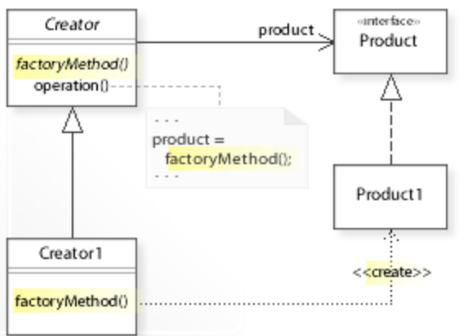

1. 제품(Product) 인터페이스 : 팩토리 메서드가 생성하는 객체의 타입을 정의

2. 구체적인 제품(Concrete Product) : 제품 인터페이스 또는 추상 클래스를 구현한 클래스

3. 창조자(Creator) 인터페이스: 제품을 생성하기 위한 팩토리 메서드를 선언. 일반적으로 이 클래스는 createProduct()라는 이름의 메서드를 포함

4. 구체적인 창조자(Concrete Creator): 창조자 클래스를 상속받아 구체적인 제품을 생성하는 팩토리 메서드를 구현

#### 3. 동작방식

- 팩토리 메서드 패턴에서 클라이언트는 창조자(Creator) 객체를 사용해 제품을 생성합니다. 클라이언트는 구체적인 제품의 클래스를 알 필요 없이, 창조자가 제공하는 팩토리 메서드를 호출하여 제품을 생성합니다. 실제로 어떤 제품이 생성될지는 서브클래스에서 정의된 팩토리 메서드 구현에 따라 달라집니다.

---

## 2. 팩토리 메서드 예제

```python
from abc import ABC, abstractmethod

# 제품(인터페이스)
class PackageDelivery(ABC):
    @abstractmethod
    def deliver(self) -> str:
        pass

# Concrete Product 1: 일반 배송
class StandardDelivery(PackageDelivery):
    def deliver(self) -> str:
        return "Delivering package by standard delivery."

# Concrete Product 2: 빠른 배송
class ExpressDelivery(PackageDelivery):
    def deliver(self) -> str:
        return "Delivering package by express delivery."

# Creator(인터페이스)
class DeliveryService(ABC):
    @abstractmethod
    def create_delivery(self) -> PackageDelivery:
        pass

    def process_delivery(self) -> str:
        delivery = self.create_delivery()  # 팩토리 메서드 호출
        return f"Processing: {delivery.deliver()}"

# concrete Creator 1: 일반 배송 서비스
class StandardDeliveryService(DeliveryService):
    def create_delivery(self) -> PackageDelivery:
        return StandardDelivery()

# concrete Creator 2: 빠른 배송 서비스
class ExpressDeliveryService(DeliveryService):
    def create_delivery(self) -> PackageDelivery:
        return ExpressDelivery()

if __name__ == "__main__":
    # 일반 배송 서비스 사용
    standard_service = StandardDeliveryService()
    print(standard_service.process_delivery())

    # 빠른 배송 서비스 사용
    express_service = ExpressDeliveryService()
    print(express_service.process_delivery())


```

---

## 3. 팩토리 메서드와 추상팩토리 메서드

#### 1. 팩토리 메서드

- 팩토리 메서드 패턴은 객체를 생성하는 메서드를 서브클래스에서 정의

- 이 패턴의 핵심은 객체 생성을 서브클래스에서 결정하도록 위임하는 것

- 즉, 팩토리 메서드는 단일 객체를 생성하는 역할을 한다.

```python
# Creator(인터페이스)
class DeliveryService(ABC):
    @abstractmethod
    def create_delivery(self) -> PackageDelivery:
        pass

    def process_delivery(self) -> str:
        delivery = self.create_delivery()  # 팩토리 메서드 호출
        return f"Processing: {delivery.deliver()}"

# concrete Creator 1: 일반 배송 서비스
class StandardDeliveryService(DeliveryService):
    def create_delivery(self) -> PackageDelivery:
        return StandardDelivery()

# concrete Creator 2: 빠른 배송 서비스
class ExpressDeliveryService(DeliveryService):
    def create_delivery(self) -> PackageDelivery:
        return ExpressDelivery()

```

#### 2. 추상 팩토리

- 추상 팩토리 패턴은 관련된 여러 객체들의 집합을 생성하는 인터페이스를 정의

- 이 패턴은 단일 객체가 아니라, 서로 관련된 객체들을 함께 생성하는 팩토리 메서드들의 집합을 제공

```python
# 추상 팩토리 (Abstract Factory)
class DeliveryFactory(ABC):
    @abstractmethod
    def create_delivery(self) -> PackageDelivery:
        pass

    @abstractmethod
    def create_packaging(self) -> Packaging:
        pass

# 구체적인 팩토리 1: 일반 배송 팩토리
class StandardDeliveryFactory(DeliveryFactory):
    def create_delivery(self) -> PackageDelivery:
        return StandardDelivery()

    def create_packaging(self) -> Packaging:
        return StandardPackaging()

# 구체적인 팩토리 2: 빠른 배송 팩토리
class ExpressDeliveryFactory(DeliveryFactory):
    def create_delivery(self) -> PackageDelivery:
        return ExpressDelivery()

    def create_packaging(self) -> Packaging:
        return ExpressPackaging()

```


